In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import os
import shutil
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir = '../../datasets/FocusPath_Full/'

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'DatabaseInfo.csv'))
df['Subjective Score'] = np.abs(df['Subjective Score'])

In [4]:
df['target'] = (df['Subjective Score'] <= 2).astype('int')

In [5]:
df['Name'] = df['Name'].str.replace('.tif', '.png')

In [6]:
df.head()

,Name,Slide #,Strip #,Slice #,Position #,Objective Score,Subjective Score,target
0,Slide01_Strip00_Slice01_Position01.png,1,0,1,1,"90,4084915785",8,0
1,Slide01_Strip00_Slice01_Position02.png,1,0,1,2,"87,9868772072",7,0
2,Slide01_Strip00_Slice01_Position03.png,1,0,1,3,"88,6678839704",7,0
3,Slide01_Strip00_Slice01_Position04.png,1,0,1,4,"92,7488673749",7,0
4,Slide01_Strip00_Slice01_Position05.png,1,0,1,5,"91,5582195015",8,0


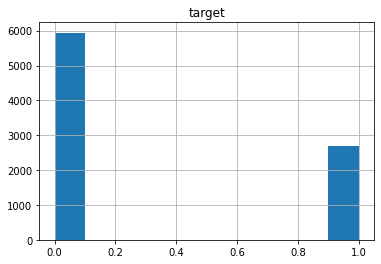

In [7]:
df.hist('target');

In [8]:
X1, y1 = df.drop('target', axis=1), df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, stratify=y1)

In [10]:
X_train['target'] = y_train
X_test['target'] = y_test

In [11]:
focus_test = X_test[X_test['target'] == 1]['Name'].to_numpy().flatten()
unfocus_test = X_test[X_test['target'] == 0]['Name'].to_numpy().flatten()

In [12]:
X2, y2 = X_train.drop('target', axis=1), X_train['target']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, stratify=y2)
X_train['target'] = y_train
X_test['target'] = y_test

In [13]:
focus_train = X_train[X_train['target'] == 1]['Name'].to_numpy().flatten()
unfocus_train = X_train[X_train['target'] == 0]['Name'].to_numpy().flatten()
focus_val = X_test[X_test['target'] == 1]['Name'].to_numpy().flatten()
unfocus_val = X_test[X_test['target'] == 0]['Name'].to_numpy().flatten()

In [14]:
print('focus_train:', len(focus_train))
print('unfocus_train:', len(unfocus_train))
print('focus_val:', len(focus_val))
print('unfocus_val:', len(unfocus_val))
print('focus_test:', len(focus_test))
print('unfocus_test:', len(unfocus_test))

focus_train: 1619
unfocus_train: 3565
focus_val: 540
unfocus_val: 1188
focus_test: 540
unfocus_test: 1188


In [15]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

In [16]:
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

In [17]:
os.mkdir(os.path.join(train_dir, '1'))
os.mkdir(os.path.join(train_dir, '0'))
os.mkdir(os.path.join(val_dir, '1'))
os.mkdir(os.path.join(val_dir, '0'))
os.mkdir(os.path.join(test_dir, '1'))
os.mkdir(os.path.join(test_dir, '0'))

In [18]:
original_data = '../../datasets/FocusPath_Full/FocusPath_full/'
len(os.listdir(original_data))

8640

In [19]:
for idx, img in enumerate(focus_train):
    src = os.path.join(original_data, img)
    dst = os.path.join(train_dir, '1')
    shutil.move(src, dst)
    if idx % 100 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(focus_train)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide09_Strip00_Slice06_Position24.png to ../../datasets/FocusPath_Full/train/1
100 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide05_Strip01_Slice10_Position06.png to ../../datasets/FocusPath_Full/train/1
200 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip01_Slice06_Position03.png to ../../datasets/FocusPath_Full/train/1
300 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide09_Strip00_Slice07_Position21.png to ../../datasets/FocusPath_Full/train/1
400 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip00_Slice09_Position06.png to ../../datasets/FocusPath_Full/train/1
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip01_Slice07_Position06.png to ../../datasets/FocusPath_Full/train/1
600 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide08_Strip01_Slice07_Position20.png to ../../datas

In [20]:
for idx, img in enumerate(unfocus_train):
    src = os.path.join(original_data, img)
    dst = os.path.join(train_dir, '0')
    shutil.move(src, dst)
    if idx % 500 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(unfocus_train)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide01_Strip01_Slice14_Position27.png to ../../datasets/FocusPath_Full/train/0
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide08_Strip00_Slice16_Position23.png to ../../datasets/FocusPath_Full/train/0
1000 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip01_Slice15_Position23.png to ../../datasets/FocusPath_Full/train/0
1500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip00_Slice04_Position10.png to ../../datasets/FocusPath_Full/train/0
2000 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide01_Strip00_Slice05_Position14.png to ../../datasets/FocusPath_Full/train/0
2500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip01_Slice05_Position01.png to ../../datasets/FocusPath_Full/train/0
3000 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide08_Strip00_Slice13_Position11.png to ../../

In [21]:
for idx, img in enumerate(focus_val):
    src = os.path.join(original_data, img)
    dst = os.path.join(val_dir, '1')
    shutil.move(src, dst)
    if idx % 100 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(focus_val)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide06_Strip01_Slice10_Position09.png to ../../datasets/FocusPath_Full/val/1
100 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide01_Strip00_Slice07_Position24.png to ../../datasets/FocusPath_Full/val/1
200 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide02_Strip01_Slice13_Position21.png to ../../datasets/FocusPath_Full/val/1
300 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide02_Strip01_Slice09_Position30.png to ../../datasets/FocusPath_Full/val/1
400 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip01_Slice08_Position16.png to ../../datasets/FocusPath_Full/val/1
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide05_Strip01_Slice07_Position20.png to ../../datasets/FocusPath_Full/val/1
540 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide05_Strip01_Slice08_Position23.png to ../../datasets/FocusPat

In [22]:
for idx, img in enumerate(unfocus_val):
    src = os.path.join(original_data, img)
    dst = os.path.join(val_dir, '0')
    shutil.move(src, dst)
    if idx % 100 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(unfocus_val)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice14_Position06.png to ../../datasets/FocusPath_Full/val/0
100 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide06_Strip00_Slice13_Position21.png to ../../datasets/FocusPath_Full/val/0
200 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice02_Position18.png to ../../datasets/FocusPath_Full/val/0
300 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide01_Strip01_Slice04_Position21.png to ../../datasets/FocusPath_Full/val/0
400 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide05_Strip01_Slice13_Position08.png to ../../datasets/FocusPath_Full/val/0
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip00_Slice16_Position17.png to ../../datasets/FocusPath_Full/val/0
600 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice01_Position11.png to ../../datasets/FocusPat

In [23]:
for idx, img in enumerate(focus_test):
    src = os.path.join(original_data, img)
    dst = os.path.join(test_dir, '1')
    shutil.move(src, dst)
    if idx % 100 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(focus_test)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice07_Position16.png to ../../datasets/FocusPath_Full/test/1
100 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide02_Strip00_Slice11_Position01.png to ../../datasets/FocusPath_Full/test/1
200 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide04_Strip01_Slice04_Position09.png to ../../datasets/FocusPath_Full/test/1
300 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide08_Strip00_Slice06_Position26.png to ../../datasets/FocusPath_Full/test/1
400 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice06_Position14.png to ../../datasets/FocusPath_Full/test/1
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip01_Slice05_Position07.png to ../../datasets/FocusPath_Full/test/1
540 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide07_Strip01_Slice10_Position23.png to ../../datasets/Fo

In [24]:
for idx, img in enumerate(unfocus_test):
    src = os.path.join(original_data, img)
    dst = os.path.join(test_dir, '0')
    shutil.move(src, dst)
    if idx % 100 == 0:
        print(f'{idx} images moved from {src} to {dst}')
print(f'{len(unfocus_test)} images moved from {src} to {dst}')

0 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip01_Slice09_Position03.png to ../../datasets/FocusPath_Full/test/0
100 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip00_Slice02_Position14.png to ../../datasets/FocusPath_Full/test/0
200 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide08_Strip00_Slice16_Position22.png to ../../datasets/FocusPath_Full/test/0
300 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip00_Slice01_Position27.png to ../../datasets/FocusPath_Full/test/0
400 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide03_Strip00_Slice04_Position05.png to ../../datasets/FocusPath_Full/test/0
500 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide06_Strip00_Slice04_Position29.png to ../../datasets/FocusPath_Full/test/0
600 images moved from ../../datasets/FocusPath_Full/FocusPath_full/Slide05_Strip01_Slice01_Position23.png to ../../datasets/Fo